In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.random import set_seed

from kaggle_prediction_interval_birthweight.workflow.validation import Validator

np.random.seed(1)
set_seed(1)

In [3]:
def plot_result(obs, lower, upper, lower_new, upper_new):
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].vlines(x=obs, ymin=lower, ymax=upper, alpha=0.25)
    ax[0].set_xlim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].set_ylim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="orange")
    ax[0].set_xlabel("observations")
    ax[0].set_ylabel("predictions")
    ax[1].hist(lower, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[1].hist(
        lower_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[1].set_xlabel("predicted lower bounds")
    ax[1].legend()
    ax[2].hist(upper, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[2].hist(
        upper_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[2].set_xlabel("predicted upper bounds")
    ax[2].legend()
    plt.show()

In [4]:
data = pd.read_csv("../data/train.csv")
data_test = pd.read_csv("../data/test.csv")

Validation on fold 1 of 2 begins.
Validation on fold 2 of 2 begins.
NOIS is 1863.4 and coverage is 91.3%.


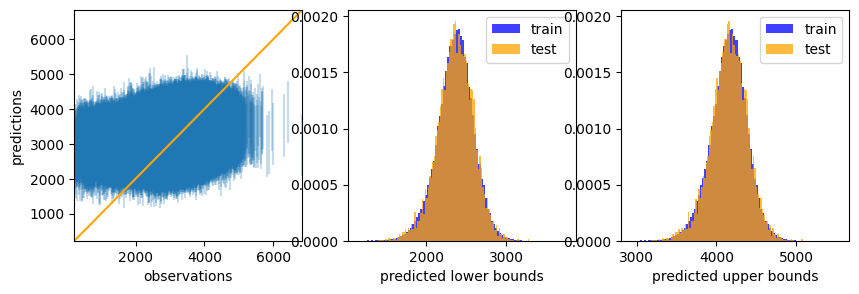

In [5]:
rr_validator = Validator("RidgeRegressor")
rr_validator.fit(data)
rr_validator.print_performance_summary()

lower, upper = rr_validator.predict_intervals(data)
lower_new, upper_new = rr_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

Validation on fold 1 of 2 begins.
1688/1688 [==============================] - 1s 534us/step
Validation on fold 2 of 2 begins.
1690/1690 [==============================] - 1s 562us/step
NOIS is 1613.3 and coverage is 87.8%.
178/178 [==============================] - 0s 565us/step


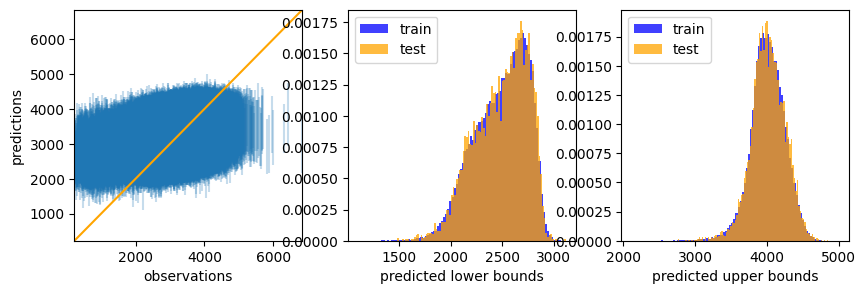

In [6]:
nn_validator = Validator("MissingnessNeuralNet", bayesian=False)
nn_validator.fit(data)
nn_validator.print_performance_summary()

lower, upper = nn_validator.predict_intervals(data)
lower_new, upper_new = nn_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

Validation on fold 1 of 2 begins.
Epoch 1/1000
38/38 [==============================] - 1s 13ms/step - loss: 136.6768 - val_loss: 9.4773
Epoch 2/1000
38/38 [==============================] - 0s 10ms/step - loss: 106.6543 - val_loss: 9.8087
Epoch 3/1000
38/38 [==============================] - 0s 10ms/step - loss: 89.9944 - val_loss: 14.1483
Epoch 4/1000
38/38 [==============================] - 0s 10ms/step - loss: 78.8479 - val_loss: 19.0954
Epoch 5/1000
38/38 [==============================] - 0s 10ms/step - loss: 69.5080 - val_loss: 23.6240
Epoch 6/1000
38/38 [==============================] - 0s 11ms/step - loss: 64.1801 - val_loss: 26.2354
Epoch 7/1000
38/38 [==============================] - 0s 11ms/step - loss: 58.3689 - val_loss: 28.1427
Epoch 8/1000
38/38 [==============================] - 0s 10ms/step - loss: 53.0037 - val_loss: 29.4332
Epoch 9/1000
38/38 [==============================] - 0s 10ms/step - loss: 49.1516 - val_loss: 30.7524
Epoch 10/1000
38/38 [==================

1000it [02:46,  6.00it/s]


Validation on fold 2 of 2 begins.
Epoch 1/1000
38/38 [==============================] - 1s 12ms/step - loss: 126.9959 - val_loss: 7.3007
Epoch 2/1000
38/38 [==============================] - 0s 9ms/step - loss: 95.8286 - val_loss: 9.4248
Epoch 3/1000
38/38 [==============================] - 0s 10ms/step - loss: 79.6915 - val_loss: 12.3946
Epoch 4/1000
38/38 [==============================] - 0s 11ms/step - loss: 70.8716 - val_loss: 15.3135
Epoch 5/1000
38/38 [==============================] - 0s 11ms/step - loss: 63.0674 - val_loss: 18.1057
Epoch 6/1000
38/38 [==============================] - 0s 11ms/step - loss: 57.9433 - val_loss: 20.6897
Epoch 7/1000
38/38 [==============================] - 0s 11ms/step - loss: 53.6750 - val_loss: 22.8609
Epoch 8/1000
38/38 [==============================] - 0s 11ms/step - loss: 48.4459 - val_loss: 25.1791
Epoch 9/1000
38/38 [==============================] - 0s 12ms/step - loss: 45.7631 - val_loss: 26.8585
Epoch 10/1000
38/38 [====================

1000it [02:45,  6.04it/s]


NOIS is 1655.2 and coverage is 88.1%.


1000it [05:38,  2.96it/s]
1000it [05:27,  3.05it/s]
1000it [00:22, 43.74it/s]
1000it [00:23, 42.77it/s]


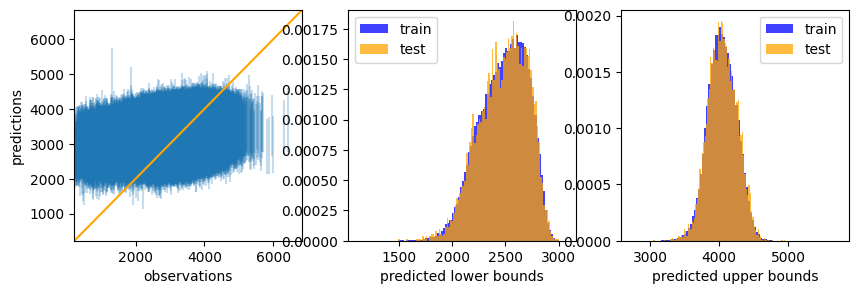

In [7]:
nn2_validator = Validator("MissingnessNeuralNet", bayesian=True)
nn2_validator.fit(data)
nn2_validator.print_performance_summary()

lower, upper = nn2_validator.predict_intervals(data)
lower_new, upper_new = nn2_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

Validation on fold 1 of 2 begins.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Validation on fold 2 of 2 begins.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
NOIS is 1646.8 and coverage is 89.1%.


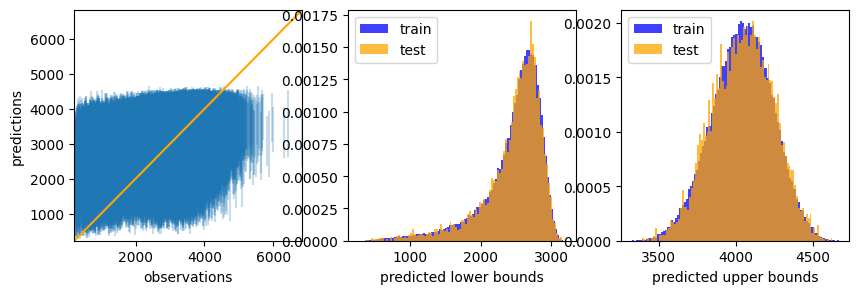

In [8]:
hbr_validator = Validator("HistBoostRegressor")
hbr_validator.fit(data)
hbr_validator.print_performance_summary()

lower, upper = hbr_validator.predict_intervals(data)
lower_new, upper_new = hbr_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

Validation on fold 1 of 2 begins.
Ensembler fold 1 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
569/569 [==============================] - 0s 508us/step
Ensembler fold 2 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
556/556 [==============================] - 0s 488us/step
Ensembler fold 3 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
566/566 [==============================] - 0s 482us/step
Training the

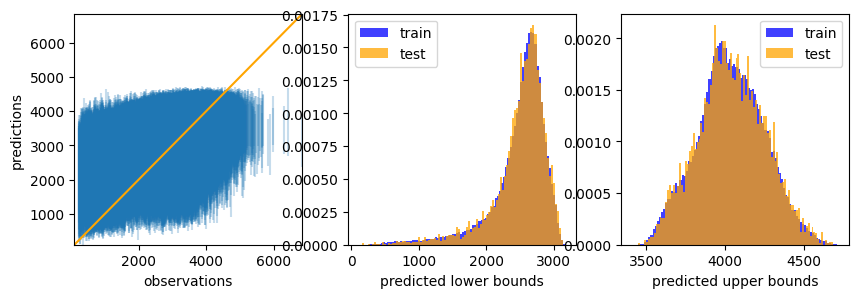

In [9]:
ens_validator = Validator("Ensembler")
ens_validator.fit(data)
ens_validator.print_performance_summary()

lower, upper = ens_validator.predict_intervals(data)
lower_new, upper_new = ens_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

In [11]:
rr_lower, rr_upper = rr_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=rr_lower, pi_upper=rr_upper).to_csv(
    "../data/submission_rr.csv",
    index=False,
)

hbr_lower, hbr_upper = hbr_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=hbr_lower, pi_upper=hbr_upper).to_csv(
    "../data/submission_hbr.csv",
    index=False,
)

nn_lower, nn_upper = nn_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=nn_lower, pi_upper=nn_upper).to_csv(
    "../data/submission_nn.csv",
    index=False,
)

nn2_lower, nn2_upper = nn2_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=nn2_lower, pi_upper=nn2_upper).to_csv(
    "../data/submission_nn2.csv",
    index=False,
)

ens_lower, ens_upper = ens_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=ens_lower, pi_upper=ens_upper).to_csv(
    "../data/submission_ens.csv",
    index=False,
)

178/178 [==============================] - 0s 504us/step


1000it [00:22, 44.40it/s]
1000it [00:21, 45.67it/s]


178/178 [==============================] - 0s 1ms/step


In [13]:
data_test[["id"]].assign(pi_lower=ens_lower * 0.995, pi_upper=ens_upper).to_csv(
    "../data/submission_ens.csv",
    index=False,
)